## Informação a consultar

Alguns links com exemplos:

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

http://playground.tensorflow.org/



# Resolução da Ficha PL 7 - Redes Neuronais

## Exercício 1

### Alínea a)

In [1]:
import numpy as np     
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
#check datatype
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

cement          0.0
slag            0.0
ash             0.0
water           0.0
superplastic    0.0
coarseagg       0.0
fineagg         0.0
age             0.0
strength        0.0
dtype: float64

### Alínea b)

In [9]:
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

In [10]:
discrete_feature = [feature for feature in colnames_numerics_only if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete variable : ",discrete_feature)

Discrete Variables Count: 1
Discrete variable :  ['age']


In [11]:
continuous_features = [feature for feature in colnames_numerics_only if feature not in discrete_feature+['strength']]
print("Continuous feature Count {}".format(len(continuous_features)))
print("Countinous feature : ",continuous_features)

Continuous feature Count 7
Countinous feature :  ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg']


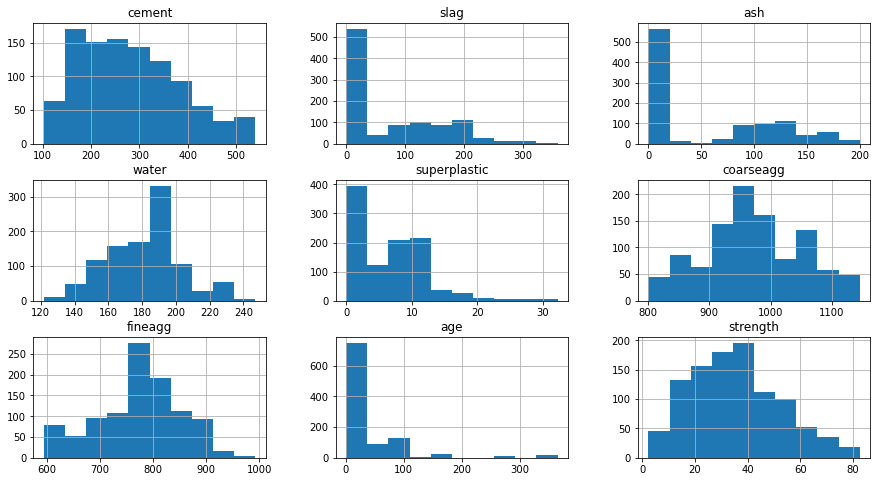

In [12]:
df.hist(figsize=(15,8))
plt.show()

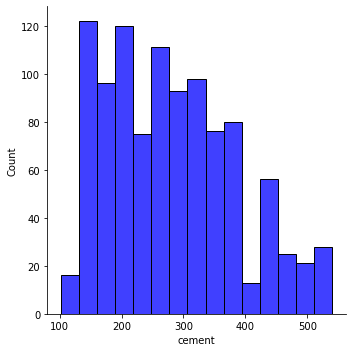

Distribution of  cement
Mean is: 281.16786407766995
Median is: 272.9
Mode is: 0    362.6
1    425.0
Name: cement, dtype: float64
Standard deviation is: 104.50636449481532
Skewness is: 0.509481178871773
Maximum is: 540.0
Minimum is: 102.0


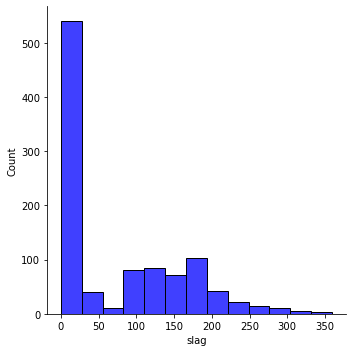

Distribution of  slag
Mean is: 73.89582524271846
Median is: 22.0
Mode is: 0    0.0
Name: slag, dtype: float64
Standard deviation is: 86.27934174810584
Skewness is: 0.8007168956061772
Maximum is: 359.4
Minimum is: 0.0


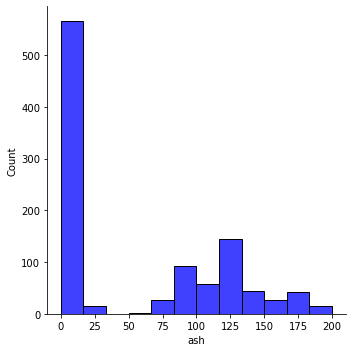

Distribution of  ash
Mean is: 54.18834951456311
Median is: 0.0
Mode is: 0    0.0
Name: ash, dtype: float64
Standard deviation is: 63.99700415268765
Skewness is: 0.5373539058066844
Maximum is: 200.1
Minimum is: 0.0


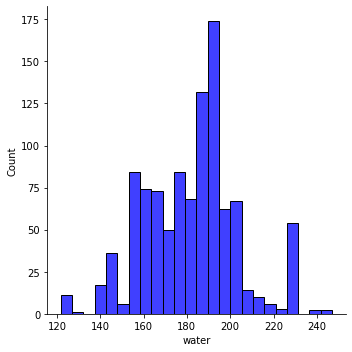

Distribution of  water
Mean is: 181.56728155339806
Median is: 185.0
Mode is: 0    192.0
Name: water, dtype: float64
Standard deviation is: 21.35421856503247
Skewness is: 0.07462838428549402
Maximum is: 247.0
Minimum is: 121.8


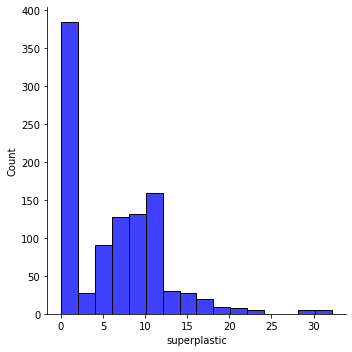

Distribution of  superplastic
Mean is: 6.204660194174758
Median is: 6.4
Mode is: 0    0.0
Name: superplastic, dtype: float64
Standard deviation is: 5.97384139248552
Skewness is: 0.9072025748672465
Maximum is: 32.2
Minimum is: 0.0


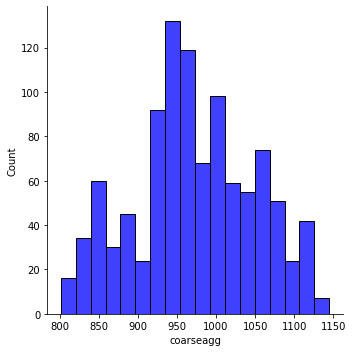

Distribution of  coarseagg
Mean is: 972.9189320388349
Median is: 968.0
Mode is: 0    932.0
Name: coarseagg, dtype: float64
Standard deviation is: 77.75395396672077
Skewness is: -0.04021974481106706
Maximum is: 1145.0
Minimum is: 801.0


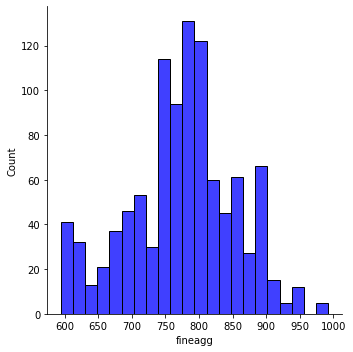

Distribution of  fineagg
Mean is: 773.5804854368932
Median is: 779.5
Mode is: 0    594.0
1    755.8
Name: fineagg, dtype: float64
Standard deviation is: 80.17598014240437
Skewness is: -0.25300959769707576
Maximum is: 992.6
Minimum is: 594.0


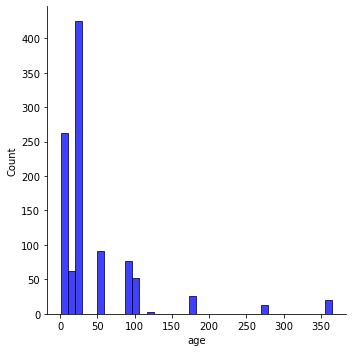

Distribution of  age
Mean is: 45.662135922330094
Median is: 28.0
Mode is: 0    28
Name: age, dtype: int64
Standard deviation is: 63.16991158103249
Skewness is: 3.26917740063459
Maximum is: 365
Minimum is: 1


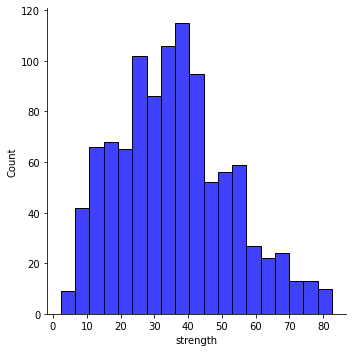

Distribution of  strength
Mean is: 35.817961165048544
Median is: 34.445
Mode is: 0    33.4
Name: strength, dtype: float64
Standard deviation is: 16.705741961912512
Skewness is: 0.416977288410718
Maximum is: 82.6
Minimum is: 2.33


In [13]:
# studying the distribution of continuous attributes mean, median, mode defining the central tendency, 
# standard deviation refecting the spread and skewness reflecting the tail 
cols = list(df.columns)
for i in np.arange(len(cols)):
    sns.displot(df[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',df[cols[i]].mean())
    print('Median is:',df[cols[i]].median())
    print('Mode is:',df[cols[i]].mode())
    print('Standard deviation is:',df[cols[i]].std())
    print('Skewness is:',df[cols[i]].skew())
    print('Maximum is:',df[cols[i]].max())
    print('Minimum is:',df[cols[i]].min())

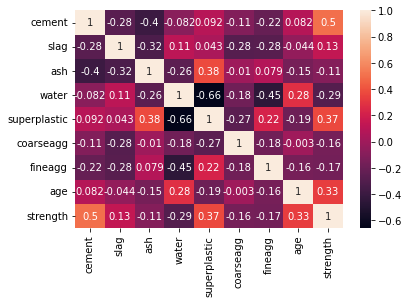

In [14]:
cor=df.corr()
sns.heatmap(cor,annot=True);

### Alínea c)

In [15]:
def normalize(y):
    y_norm=((y-np.min(y))/(np.max(y)-np.min(y)))
    return y_norm

In [16]:
#verify data before norm.
df.strength.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

In [17]:
# Normalizing the DataFrame
data_norm = df.apply(normalize)

In [18]:
# Display summary after normalization
print(data_norm['strength'].describe())
print(data_norm.describe())

count    1030.000000
mean        0.417191
std         0.208119
min         0.000000
25%         0.266351
50%         0.400087
75%         0.545721
max         1.000000
Name: strength, dtype: float64
            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean      0.409059     0.205609     0.270806     0.477374      0.192691   
std       0.238599     0.240065     0.319825     0.170561      0.185523   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.206336     0.000000     0.000000     0.344249      0.000000   
50%       0.390183     0.061213     0.000000     0.504792      0.198758   
75%       0.566210     0.397746     0.591204     0.560703      0.316770   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean 

### Alínea d)

In [19]:
n_rows = len(data_norm)
index = np.random.choice(n_rows, size=int(0.7 * n_rows), replace=False)

# Split the data into train and test sets
data_train = data_norm.iloc[index]
data_test = data_norm.drop(index)

In [20]:
# Display summary statistics for train and test sets
print('Train:')
print(data_train['strength'].describe())
print('Test:')
print(data_test['strength'].describe())

Train:
count    721.000000
mean       0.422884
std        0.208887
min        0.012333
25%        0.268593
50%        0.409119
75%        0.558116
max        1.000000
Name: strength, dtype: float64
Test:
count    309.000000
mean       0.403909
std        0.206042
min        0.000000
25%        0.252896
50%        0.388813
75%        0.517753
max        0.970101
Name: strength, dtype: float64


In [21]:
#Split labels of train and test data
x_train=data_train.drop(["strength"], axis=1)
y_train=data_train["strength"]
#
x_test=data_test.drop(["strength"], axis=1)
y_test=data_test["strength"]

### Alínea e)

In [22]:
Nhidden=1

In [23]:
nn = MLPRegressor(hidden_layer_sizes=Nhidden, activation='tanh',
                   solver='lbfgs', max_iter=1000, learning_rate_init=0.001)


In [24]:
nn.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=1, max_iter=1000,
             solver='lbfgs')

In [25]:
# Make prediction
pred = nn.predict(x_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = nn.score(x_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)


R_squared value:  0.7035520746424737
RMSE:  0.11200183272643423


### Alínea f)

#### Ponto i)

In [26]:
Nhidden=3

In [27]:
nn = MLPRegressor(hidden_layer_sizes=Nhidden,
                                          activation='tanh',
                                          solver='lbfgs', max_iter=1000, learning_rate_init=0.001)

In [28]:
nn.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=3, max_iter=1000,
             solver='lbfgs')

In [29]:
# Make prediction
pred = nn.predict(x_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = nn.score(x_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.8698412945055793
RMSE:  0.07421428913326548


#### Ponto iii)

In [30]:
Nhidden=[6,2]

In [31]:
nn = MLPRegressor(hidden_layer_sizes=Nhidden,
                                          activation='tanh',
                                          solver='lbfgs', max_iter=2000, learning_rate_init=0.001)

In [32]:
nn.fit(x_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=[6, 2], max_iter=2000,
             solver='lbfgs')

In [33]:
# Make prediction
pred = nn.predict(x_test)
#
# Calculate accuracy and error metrics
#
test_set_rsquared = nn.score(x_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
#
# Print R_squared and RMSE value
#
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.8696586625140553
RMSE:  0.0742663377156881


Não é possível fazer um plot da arquitetura da rede, com o Sklearn, mas é possível consultar os coeficientes das várias layers do modelo.

In [34]:
print("weights between input and first hidden layer:")
print(nn.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(nn.coefs_[1])

weights between input and first hidden layer:
[[-0.08644048 -0.03326485 -0.91419294 -0.78421442 -1.71570168 -0.09215346]
 [-0.43734543 -0.73102707 -1.253515   -0.11996106 -0.64931928  0.31971851]
 [-0.25016534 -0.16045741 -0.62970063 -0.81028763 -0.09286733  0.62879806]
 [-0.53241471  1.63307932  1.2101549  -1.04395175 -1.45777022  0.19641825]
 [-0.38797546  0.72972394  0.55857801 -0.88987608 -1.73252645 -0.1368729 ]
 [-0.19427781  0.35005684 -0.51233505 -0.63081381  0.35228084  1.20587201]
 [-0.08753155  0.20848756 -0.78176194 -0.73491979  0.12488363  1.49289166]
 [-0.049078    6.81566502  0.83184154  0.2398892  -0.9065503  -1.73272015]]

weights between first hidden and second hidden layer:
[[-0.43421626 -0.49949356]
 [ 0.95620905 -2.67479586]
 [-1.31816497  1.61747163]
 [-0.25432305 -0.53082552]
 [ 1.58840146  1.80181142]
 [-1.70743028 -0.9362878 ]]


### Alínea g)

In [35]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare

In [36]:
# Set the data

X_data=data_norm.drop(["strength"], axis=1)
Y_data=data_norm["strength"]

In [37]:
k = 10 # num folds
folds = np.random.choice(10, len(data_norm), replace = True)

print(pd.Series(folds).value_counts())

cv_error= np.zeros((k, 3))

2    115
0    113
9    109
1    105
8    101
7    100
6    100
4     98
3     98
5     91
dtype: int64


In [38]:
Nhidden=[6,2]
for i in range(10):
    train_cv = data_norm[folds != i]
    test_cv = data_norm[folds == i]

    nn = MLPRegressor(hidden_layer_sizes=Nhidden, activation='tanh',
                       solver='lbfgs', max_iter=1000, learning_rate_init=0.001)

    
    nn.fit(train_cv.iloc[:, :-1], train_cv.iloc[:, -1])
    nn_pred = nn.predict(test_cv.iloc[:, :-1])

    mlr_model = LinearRegression()
    mlr_model.fit(train_cv.iloc[:, :-1], train_cv.iloc[:, -1])
    mlr_pred = mlr_model.predict(test_cv.iloc[:, :-1])
  
    rpart_model = DecisionTreeRegressor(random_state=42)
    rpart_model.fit(train_cv.iloc[:, :-1], train_cv.iloc[:, -1])
    rpart_pred = rpart_model.predict(test_cv.iloc[:, :-1])
  
    cv_error[i-1] = [
        np.sqrt(mean_squared_error(nn_pred, test_cv.iloc[:, -1])),
        np.sqrt(mean_squared_error(mlr_pred, test_cv.iloc[:, -1])),
        np.sqrt(mean_squared_error(rpart_pred, test_cv.iloc[:, -1]))
    ]

In [39]:
cv_error

array([[0.08408034, 0.13239681, 0.0809543 ],
       [0.07513059, 0.13614244, 0.07006625],
       [0.07346829, 0.12572074, 0.07763982],
       [0.08145553, 0.14513784, 0.07608227],
       [0.06530695, 0.12117303, 0.07712772],
       [0.08587824, 0.14520807, 0.07163751],
       [0.07117462, 0.11181747, 0.0998679 ],
       [0.06647603, 0.13269866, 0.07012077],
       [0.07359175, 0.12537324, 0.07187782],
       [0.07543659, 0.12251318, 0.07562408]])

In [40]:
# Mean and standard deviation calculation
mean_cv_error = np.mean(cv_error, axis=0)
sd_cv_error = np.std(cv_error, axis=0)

In [41]:
print("Mean of CV Error:")
print(mean_cv_error)
print("Standard Deviation of CV Error:")
print(sd_cv_error)

Mean of CV Error:
[0.07519989 0.12981815 0.07709984]
Standard Deviation of CV Error:
[0.006541   0.0100755  0.00831885]


### Alínea i)

Formulação de Hipóteses:
H0 = Não há diferença significtiva entre os grupos
H1 = Há diferença significativa entre os grupos

Regra de decisão:
    Se p_value < alpha: Rejeita-se H0
    Senão : Não se rejeita H0

In [42]:
# Friedman test
friedman_stat, friedman_pvalue = friedmanchisquare(*cv_error)
print("Friedman Test:")
print("Test Statistic:", friedman_stat)
print("p-value:", friedman_pvalue)

Friedman Test:
Test Statistic: 8.599999999999994
p-value: 0.4749856866480102


In [43]:
alpha = 0.05
if friedman_pvalue < alpha:
    print("Existe uma diferença significativa entre os grupos.")
else:
    print("Não existe uma diferença significativa entre os grupos.")

Não existe uma diferença significativa entre os grupos.


In [44]:
# Wilcoxon test
wilcox_stat, wilcox_pvalue = wilcoxon(cv_error[:, 0], cv_error[:, 2])
print("Wilcoxon Test:")
print("Test Statistic:", wilcox_stat)
print("p-value:", wilcox_pvalue)

Wilcoxon Test:
Test Statistic: 27.0
p-value: 1.0


In [45]:
alpha = 0.05
if wilcox_pvalue < alpha:
    print("Existe uma diferença significativa entre os pares de grupos.")
else:
    print("Não existe uma diferença significativa entre os pares de grupos.")

Não existe uma diferença significativa entre os pares de grupos.
